In [1]:
import magpylib as magpy
import numpy as np
import matplotlib.pyplot as plt
import coil as co


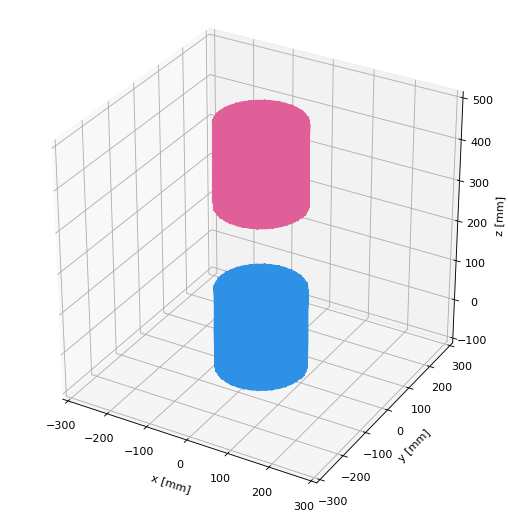

In [2]:
#some big number
step=2000
#turn
turn=100
lenght=200
magic=turn/lenght
dl=np.linspace(0,turn,step)
vertex=np.c_[np.cos(2*np.pi*dl)*100,np.sin(2*np.pi*dl)*100,((dl-turn/2)/magic)]
coil1 = magpy.current.Line(
    current=100,
    vertices=vertex,
    position=(0,0,0)   
)
co2Pos=(0,0,201)
coil2 = magpy.current.Line(
    current=100,
    position=co2Pos,
    vertices=vertex+co2Pos
)

#coil2.rotate_from_euler(180,"x")
magpy.show(coil1,coil2)


In [44]:
print(coil2.vertices[1:])

[[ 9.51007940e+01  3.09166457e+01  1.00100050e+02]
 [ 8.08832204e+01  5.88039511e+01  1.00200100e+02]
 [ 5.87403756e+01  8.09294030e+01  1.00300150e+02]
 ...
 [ 8.08832204e+01 -5.88039511e+01  2.99799900e+02]
 [ 9.51007940e+01 -3.09166457e+01  2.99899950e+02]
 [ 1.00000000e+02  3.92877345e-13  3.00000000e+02]]


In [91]:
print(coil2.vertices[0])
print(coil1.getB([100,0,100]))

[100.   0. 101.]
[ 7.19379275e+10  1.15100684e+12 -3.59197405e+14]


In [90]:
b_on_c2 = coil1.getB(coil2.vertices)




[[ 4.79492405e+01 -1.24858232e+00  1.14198220e+01]
 [ 3.61534766e+01  1.20787540e+01  1.14198220e+01]
 [ 3.06510459e+01  2.26650535e+01  1.13823224e+01]
 ...
 [ 7.34908148e-01 -5.37094115e-01  1.69487306e+00]
 [ 8.59762674e-01 -2.84393649e-01  1.69457410e+00]
 [ 8.99916803e-01 -5.54605486e-03  1.69457410e+00]]


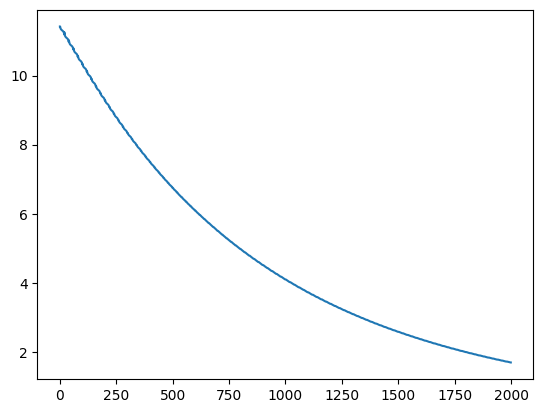

In [92]:
print(b_on_c2)

plt.plot(range(0,len(b_on_c2[:,2])),b_on_c2[:,2])
plt.show()

In [19]:
def normal(v):
    return v/np.linalg.norm(v)


In [48]:
lenght=len(b_on_c2)
print(lenght)
fTotal=0
for idx in range(1,lenght-1):
    fTotal+=100*np.cross( (coil2.vertices[idx+1]-coil2.vertices[idx])/1000 , b_on_c2[idx]/1000)
print(fTotal)    

1999
[-3.94852301e-02  9.00254359e-02 -3.99790303e+01]


B hesaplamca denemeleri

In [104]:
k=1e-7
dl=np.linspace(0,1,1000)
loop=np.c_[np.cos(2*np.pi*dl)*1,np.sin(2*np.pi*dl)*1,dl*0]
where=np.c_[np.cos(2*np.pi*dl)*1,np.sin(2*np.pi*dl)*1,dl*0+1]
B=[]

for idy in range(len(where)):
    temp=0
    for idx in range(0,len(loop)-1):  
        temp+=k*(np.cross( loop[idx+1]-loop[idx]  , where[idy]-loop[idx]  )) / (np.linalg.norm(where[idy]-loop[idx] )**3)
    B.append(temp)
B=np.array(B)

In [105]:
F=0
for idx in range(0,len(where)-1):
    F+=(np.cross( where[idx+1]-where[idx]  , B[idx]))
print(F)

[ 1.60266244e-22  2.42863944e-22 -7.18363305e-07]
